/tmp/ipykernel_25191/2705585773.py:7: RuntimeWarning: invalid value encountered in sqrt
  integrand = lambda y_val: np.sqrt((y1**alpha - y_val**alpha) / (k**2 - (y1**alpha - y_val**alpha)))
/tmp/ipykernel_25191/2705585773.py:8: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  x_val, _ = quad(integrand, y, y1)  # integrate from current y to y1


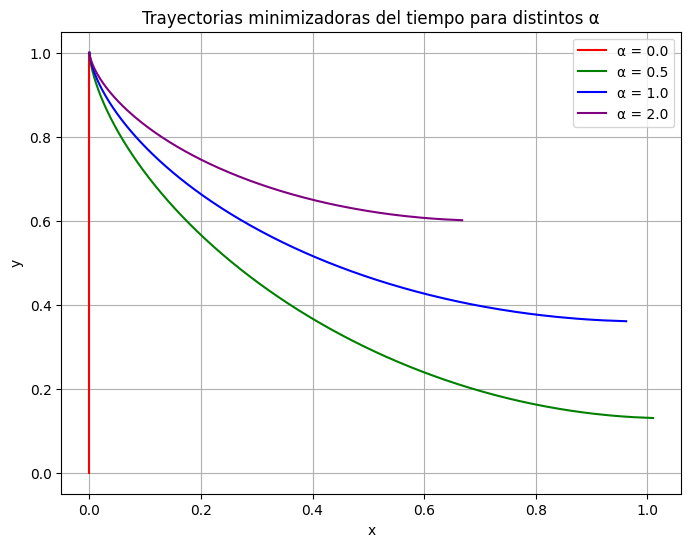

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def x_of_y(y, alpha, k, y1=1.0):
    # Define the integrand: dx/dy = sqrt((y1^alpha - y^alpha) / (k^2 - (y1^alpha - y^alpha)))
    integrand = lambda y_val: np.sqrt((y1**alpha - y_val**alpha) / (k**2 - (y1**alpha - y_val**alpha)))
    x_val, _ = quad(integrand, y, y1)  # integrate from current y to y1
    return x_val

# Parameters
y1 = 1.0   # starting vertical position (initial height)
y2 = 0.0   # ending vertical position
# Choose a constant k (this parameter must be chosen so that the denominator stays positive;
# for the standard brachistochrone with alpha=1, k is related to the cycloid parameters).
k = 0.8

# Values of alpha to test
alpha_values = [0.0, 0.5, 1.0, 2.0]
colors = ['red', 'green', 'blue', 'purple']

plt.figure(figsize=(8,6))

# Loop over different alpha values
for alpha, col in zip(alpha_values, colors):
    # Create an array of y values from y2 to y1. We avoid the singularity at y=y1 by a small offset.
    y_vals = np.linspace(y2 + 1e-6, y1, 500)
    # Compute corresponding x(y) using the integral
    x_vals = np.array([x_of_y(y, alpha, k, y1) for y in y_vals])
    # Plot x vs. y (note: x increases as y decreases)
    plt.plot(x_vals, y_vals, label=f'α = {alpha}', color=col)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Trayectorias minimizadoras del tiempo para distintos α')
plt.legend()
#plt.gca().invert_yaxis()  # Typical for brachistochrone: y decreases as we move right
plt.grid(True)
plt.show()